<a href="https://colab.research.google.com/github/MayraCuautleBastida/churn_rate_model/blob/main/User_classification_online_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

In [ ]:
# Query Bigquery
query = "SELECT * FROM `wagon-data-project.Final_banking.Official_Users_features_Churn_cleaned`"
project = "wagon-data-project"

df = pd.read_gbq(query=query, project_id=project)

In [ ]:
df.head()

,user_id,age,country,devices,plan,plan_price,transactions_type,amount_usd,users_date,days_since_user,...,nb_transactions,avg_transaction_day,avg_transaction_month,first_notification_date,last_notification_date,days_since_last_notification,notification_duration_days,notification_duration_months,nb_notifications,churn_users
0,user_14001,38,Italy,Android,STANDARD,3.99,none,0.0,2018-10-21,207,...,0,0.0,0.0,2018-11-04,2018-11-04,193,0,0,1,1
1,user_14874,38,Greece,Apple,STANDARD,3.99,none,0.0,2018-10-29,199,...,0,0.0,0.0,2018-12-13,2018-12-13,154,0,0,1,1
2,user_60,53,Lithuania,Android,STANDARD,3.99,none,0.0,2018-01-22,479,...,0,0.0,0.0,2018-03-07,2019-01-21,115,320,10,3,1
3,user_4055,28,Lithuania,Apple,STANDARD,3.99,none,0.0,2018-04-21,390,...,0,0.0,0.0,2018-05-04,2018-05-10,371,6,0,2,1
4,user_17299,33,Portugal,Apple,STANDARD,3.99,none,0.0,2018-12-03,164,...,0,0.0,0.0,2018-12-19,2018-12-19,148,0,0,1,1


In [ ]:
df.isnull().sum()

user_id                         0
age                             0
country                         0
devices                         0
plan                            0
plan_price                      0
transactions_type               0
amount_usd                      0
users_date                      0
days_since_user                 0
months_since_user               0
first_transaction_date          0
last_transaction_date           0
days_since_last_transaction     0
transaction_duration_days       0
transaction_duration_months     0
nb_transactions                 0
avg_transaction_day             0
avg_transaction_month           0
first_notification_date         0
last_notification_date          0
days_since_last_notification    0
notification_duration_days      0
notification_duration_months    0
nb_notifications                0
churn_users                     0
dtype: int64

In [ ]:
df.shape


(19430, 26)

In [ ]:
df.describe()

,age,plan_price,amount_usd,days_since_user,months_since_user,days_since_last_transaction,transaction_duration_days,transaction_duration_months,nb_transactions,avg_transaction_day,avg_transaction_month,days_since_last_notification,notification_duration_days,notification_duration_months,nb_notifications,churn_users
count,19430.0,19430.000000,1.943000e+04,19430.0,19430.0,19430.0,19430.0,19430.0,19430.0,19430.000000,19430.000000,19430.0,19430.0,19430.0,19430.0,19430.0
mean,40.351364,4.518585,7.986636e+03,296.984097,9.776274,82.254915,199.710757,6.654812,123.930417,0.471179,15.045394,108.866186,128.93721,4.268811,4.605095,0.302213
std,11.368871,2.150854,4.098283e+04,104.673518,3.41546,110.178971,136.882498,4.549666,224.408369,0.925540,23.869336,81.321359,112.508433,3.72976,2.810106,0.459229
min,23.0,0.000000,0.000000e+00,133.0,4.0,1.0,0.0,0.0,0.0,0.000000,0.000000,4.0,0.0,0.0,0.0,0.0
25%,32.0,3.990000,2.562500e+02,205.0,7.0,8.0,92.0,3.0,10.0,0.000000,2.000000,69.0,30.0,1.0,3.0,0.0
50%,38.0,3.990000,1.919500e+03,288.0,9.0,22.0,195.0,7.0,45.0,0.000000,7.000000,84.0,104.0,3.0,4.0,0.0
75%,46.0,3.990000,6.562000e+03,383.0,13.0,130.0,305.0,10.0,136.0,1.000000,18.000000,118.0,197.0,6.0,6.0,1.0
max,95.0,15.990000,3.206683e+06,500.0,16.0,498.0,494.0,16.0,4996.0,21.000000,625.000000,496.0,477.0,16.0,20.0,1.0


In [ ]:
df.columns

Index(['user_id', 'age', 'country', 'devices', 'plan', 'plan_price',
       'transactions_type', 'amount_usd', 'users_date', 'days_since_user',
       'months_since_user', 'first_transaction_date', 'last_transaction_date',
       'days_since_last_transaction', 'transaction_duration_days',
       'transaction_duration_months', 'nb_transactions', 'avg_transaction_day',
       'avg_transaction_month', 'first_notification_date',
       'last_notification_date', 'days_since_last_notification',
       'notification_duration_days', 'notification_duration_months',
       'nb_notifications', 'churn_users'],
      dtype='object')

In [ ]:
df = df.set_index('user_id')

# First Classification Model (only numerical values)

In [ ]:
from sklearn.model_selection import train_test_split

columns_to_drop=['country', 'devices', 'plan','transactions_type','users_date','first_transaction_date', 'last_transaction_date','first_notification_date', 'last_notification_date', 'churn_users']

# every columns except churn rate which is our target
X = df.drop(columns=columns_to_drop, axis=1)
y = df['churn_users']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# store customers_ids for after
test_users_ids = X_test.index

In [ ]:
X

,age,plan_price,amount_usd,days_since_user,months_since_user,days_since_last_transaction,transaction_duration_days,transaction_duration_months,nb_transactions,avg_transaction_day,avg_transaction_month,days_since_last_notification,notification_duration_days,notification_duration_months,nb_notifications
user_id,,,,,,,,,,,,,,,
user_14001,38,3.99,0.0,207,7,207,0,0,0,0.0,0.0,193,0,0,1
user_14874,38,3.99,0.0,199,7,199,0,0,0,0.0,0.0,154,0,0,1
user_60,53,3.99,0.0,479,16,479,0,0,0,0.0,0.0,115,320,10,3
user_4055,28,3.99,0.0,390,13,390,0,0,0,0.0,0.0,371,6,0,2
user_17299,33,3.99,0.0,164,5,164,0,0,0,0.0,0.0,148,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_1550,47,3.99,63186.0,464,15,18,446,14,367,1.0,26.0,113,137,4,5
user_3051,41,3.99,513.0,411,14,9,402,14,35,0.0,3.0,113,64,2,2
user_3135,31,8.99,24020.0,430,14,5,416,14,1220,3.0,87.0,113,108,3,3


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15544, 15), (3886, 15), (15544,), (3886,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# apply same transformation on X_test
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

baseline_y_pred = pd.Series(np.ones([3886]))

baseline_accuracy = accuracy_score(y_test, baseline_y_pred)

print(f"Baseline accuracy is {round(baseline_accuracy,2)}")

Baseline accuracy is 0.3


In [ ]:
from sklearn.linear_model import LogisticRegression

# train model
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# store predictions
y_pred = clf.predict(X_test_scaled)

In [ ]:
accuracy_test = clf.score(X_test_scaled, y_test)

print(f"test data accuracy = {round(accuracy_test, 3)}")

test data accuracy = 0.95


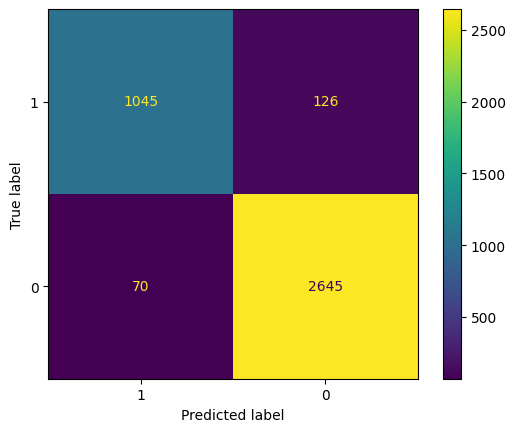

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test,labels=[1, 0])

In [ ]:
from sklearn.metrics import recall_score

simple_log_recall = round(recall_score(y_test, y_pred),3)

simple_log_recall

0.892

In [ ]:
from sklearn.metrics import precision_score

simple_log_precision = precision_score(y_test, y_pred)

simple_log_precision

0.9372197309417041

In [ ]:
clf.coef_

array([[ 0.02281799,  0.0670249 , -1.61919929,  0.41307165,  0.47596603,
         5.05331916, -0.81980392,  0.87559394, -5.36446378,  1.97624468,
        -1.51541581,  0.0896597 , -0.32853178,  0.42108245, -0.1728663 ]])

In [ ]:
X.columns


Index(['age', 'plan_price', 'amount_usd', 'days_since_user',
       'months_since_user', 'days_since_last_transaction',
       'transaction_duration_days', 'transaction_duration_months',
       'nb_transactions', 'avg_transaction_day', 'avg_transaction_month',
       'days_since_last_notification', 'notification_duration_days',
       'notification_duration_months', 'nb_notifications'],
      dtype='object')

In [ ]:
# Example coefficients
coefficients = [ 0.02281799,  0.0670249 , -1.61919929,  0.41307165,  0.47596603,
         5.05331916, -0.81980392,  0.87559394, -5.36446378,  1.97624468,
        -1.51541581,  0.0896597 , -0.32853178,  0.42108245, -0.1728663 ]
features =['age', 'plan_price', 'amount_usd', 'days_since_user',
       'months_since_user', 'days_since_last_transaction',
       'transaction_duration_days', 'transaction_duration_months',
       'nb_transactions', 'avg_transaction_day', 'avg_transaction_month',
       'days_since_last_notification', 'notification_duration_days',
       'notification_duration_months', 'nb_notifications']





In [ ]:
# Create DataFrame
df_coeff = pd.DataFrame({'Features': features, 'Coefficients': coefficients})

In [ ]:
import plotly.express as px

# Plot coefficients using Plotly Express
fig = px.bar(df_coeff, x='Coefficients', y='Features', orientation='h',
             title='Coefficients Plot', labels={'Coefficients': 'Coefficient Value'})
fig.show()

# Second Classification Model (numerical and string features)

In [ ]:
df_cat=df.reset_index(drop=True)
df_cat

,age,country,devices,plan,plan_price,transactions_type,amount_usd,users_date,days_since_user,months_since_user,...,nb_transactions,avg_transaction_day,avg_transaction_month,first_notification_date,last_notification_date,days_since_last_notification,notification_duration_days,notification_duration_months,nb_notifications,churn_users
0,38,Italy,Android,STANDARD,3.99,none,0.0,2018-10-21,207,7,...,0,0.0,0.0,2018-11-04,2018-11-04,193,0,0,1,1
1,38,Greece,Apple,STANDARD,3.99,none,0.0,2018-10-29,199,7,...,0,0.0,0.0,2018-12-13,2018-12-13,154,0,0,1,1
2,53,Lithuania,Android,STANDARD,3.99,none,0.0,2018-01-22,479,16,...,0,0.0,0.0,2018-03-07,2019-01-21,115,320,10,3,1
3,28,Lithuania,Apple,STANDARD,3.99,none,0.0,2018-04-21,390,13,...,0,0.0,0.0,2018-05-04,2018-05-10,371,6,0,2,1
4,33,Portugal,Apple,STANDARD,3.99,none,0.0,2018-12-03,164,5,...,0,0.0,0.0,2018-12-19,2018-12-19,148,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,47,Switzerland,Android,STANDARD,3.99,CARD_PAYMENT,63186.0,2018-02-06,464,15,...,367,1.0,26.0,2018-09-08,2019-01-23,113,137,4,5,0
19426,41,Latvia,Android,STANDARD,3.99,TRANSFER,513.0,2018-03-31,411,14,...,35,0.0,3.0,2018-11-20,2019-01-23,113,64,2,2,0
19427,31,Lithuania,Android,PREMIUM,8.99,CARD_PAYMENT,24020.0,2018-03-12,430,14,...,1220,3.0,87.0,2018-10-07,2019-01-23,113,108,3,3,0
19428,38,Portugal,Android,PREMIUM,8.99,CARD_PAYMENT,17326.0,2018-01-11,490,16,...,193,0.0,13.0,2018-07-21,2019-01-23,113,186,6,5,0


In [ ]:
df_cat = df.select_dtypes(include=['object'])
#df_cat=df_cat.drop(columns='user_id')
df_cat

,country,devices,plan,transactions_type
user_id,,,,
user_14001,Italy,Android,STANDARD,none
user_14874,Greece,Apple,STANDARD,none
user_60,Lithuania,Android,STANDARD,none
user_4055,Lithuania,Apple,STANDARD,none
user_17299,Portugal,Apple,STANDARD,none
...,...,...,...,...
user_1550,Switzerland,Android,STANDARD,CARD_PAYMENT
user_3051,Latvia,Android,STANDARD,TRANSFER
user_3135,Lithuania,Android,PREMIUM,CARD_PAYMENT


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
df_cat = encoder.fit_transform(df_cat)
df_cat['churn_users']= df['churn_users']
df_cat

,country_Australia,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,...,transactions_type_CARD_PAYMENT,transactions_type_CARD_REFUND,transactions_type_CASHBACK,transactions_type_EXCHANGE,transactions_type_FEE,transactions_type_REFUND,transactions_type_TOPUP,transactions_type_TRANSFER,transactions_type_none,churn_users
user_id,,,,,,,,,,,,,,,,,,,,,
user_14001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
user_14874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
user_60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
user_4055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
user_17299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_1550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
user_3051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
user_3135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split

columns_to_drop=['country', 'devices', 'plan','transactions_type','users_date','first_transaction_date', 'last_transaction_date','first_notification_date', 'last_notification_date', 'churn_users']

# every columns except churn rate which is our target
X_cat = df_cat.drop(['churn_users'], axis=1)
y_cat = df_cat['churn_users']

In [ ]:
X_cat

,country_Australia,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,...,transactions_type_ATM,transactions_type_CARD_PAYMENT,transactions_type_CARD_REFUND,transactions_type_CASHBACK,transactions_type_EXCHANGE,transactions_type_FEE,transactions_type_REFUND,transactions_type_TOPUP,transactions_type_TRANSFER,transactions_type_none
user_id,,,,,,,,,,,,,,,,,,,,,
user_14001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_14874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_4055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_17299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_1550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_3051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
user_3135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_full = pd.concat([X, X_cat], axis=1)
#y_full = pd.concat([y, y_cat], axis=1)


In [ ]:
X_full.columns

Index(['age', 'plan_price', 'amount_usd', 'days_since_user',
       'months_since_user', 'days_since_last_transaction',
       'transaction_duration_days', 'transaction_duration_months',
       'nb_transactions', 'avg_transaction_day', 'avg_transaction_month',
       'days_since_last_notification', 'notification_duration_days',
       'notification_duration_months', 'nb_notifications', 'country_Australia',
       'country_Austria', 'country_Belgium', 'country_Bulgaria',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Estonia', 'country_Finland',
       'country_France', 'country_French Guiana', 'country_Germany',
       'country_Gibraltar', 'country_Greece', 'country_Guadeloupe',
       'country_Guernsey', 'country_Hungary', 'country_Iceland',
       'country_Ireland', 'country_Isle of Man', 'country_Italy',
       'country_Jersey', 'country_Latvia', 'country_Liechtenstein',
       'country_Lithuania', 'country_Luxembourg', 'coun

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=1)

# store customers_ids for after
test_users_ids = X_test.index

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15544, 75), (3886, 75), (15544,), (3886,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train)

# apply same transformation on X_test
X_test_scaled_new = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

baseline_y_pred = pd.Series(np.ones([3886]))

baseline_accuracy = accuracy_score(y_test, baseline_y_pred)

print(f"Baseline accuracy is {round(baseline_accuracy,2)}")

Baseline accuracy is 0.3


In [ ]:
from sklearn.linear_model import LogisticRegression

# train model
clf = LogisticRegression()
clf.fit(X_train_scaled_new, y_train)

# store predictions
y_pred = clf.predict(X_test_scaled_new)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
accuracy_test = clf.score(X_test_scaled_new, y_test)

print(f"test data accuracy = {round(accuracy_test, 3)}")

test data accuracy = 0.949


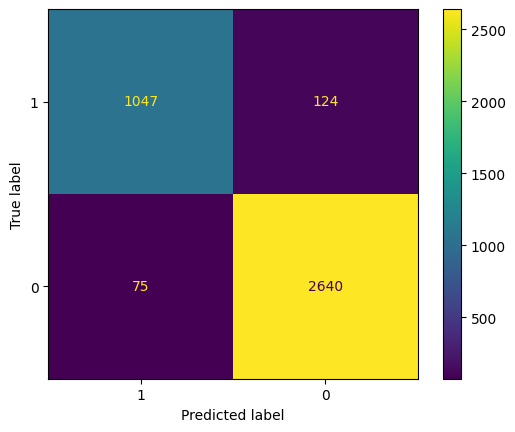

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled_new, y_test,labels=[1, 0])

In [ ]:
from sklearn.metrics import recall_score

simple_log_recall = round(recall_score(y_test, y_pred),3)

simple_log_recall

0.894

In [ ]:
from sklearn.metrics import precision_score

simple_log_precision = precision_score(y_test, y_pred)

simple_log_precision

0.9331550802139037

In [ ]:
clf.coef_

array([[ 4.00392086e-02,  8.68314510e-03, -2.11410324e+00,
         3.28157009e-01,  5.69454896e-01,  5.28757344e+00,
        -7.50400248e-01,  1.01842460e+00, -4.92852042e+00,
         1.79479040e+00, -8.61070859e-01,  4.66086626e-02,
        -3.04404311e-01,  3.92642426e-01, -1.71284554e-01,
         1.51880162e-01,  3.17620127e-02, -1.04043280e-02,
         4.17998081e-02,  9.64472773e-02,  9.32942952e-03,
         6.75749191e-02,  1.11564600e-02, -5.94413735e-02,
        -1.05804791e-02, -7.34691273e-04, -1.03789281e-02,
         4.82636380e-03, -1.96199727e-01, -5.54580345e-02,
        -1.14873631e-01,  7.85379455e-02,  5.24629228e-02,
         1.64631752e-02,  2.75160516e-02,  4.32607735e-02,
         4.39756293e-03, -5.13673865e-02,  8.96394194e-03,
        -4.78050331e-02, -3.07735552e-02, -5.38914570e-02,
        -6.41152490e-02, -3.97320587e-02,  2.05422154e-02,
         3.28143261e-02, -6.91541146e-02, -1.30338044e-03,
         1.10548970e-01, -1.25334540e-02, -1.78385534e-0

In [ ]:
X_full.columns

Index(['age', 'plan_price', 'amount_usd', 'days_since_user',
       'months_since_user', 'days_since_last_transaction',
       'transaction_duration_days', 'transaction_duration_months',
       'nb_transactions', 'avg_transaction_day', 'avg_transaction_month',
       'days_since_last_notification', 'notification_duration_days',
       'notification_duration_months', 'nb_notifications', 'country_Australia',
       'country_Austria', 'country_Belgium', 'country_Bulgaria',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Estonia', 'country_Finland',
       'country_France', 'country_French Guiana', 'country_Germany',
       'country_Gibraltar', 'country_Greece', 'country_Guadeloupe',
       'country_Guernsey', 'country_Hungary', 'country_Iceland',
       'country_Ireland', 'country_Isle of Man', 'country_Italy',
       'country_Jersey', 'country_Latvia', 'country_Liechtenstein',
       'country_Lithuania', 'country_Luxembourg', 'coun

In [ ]:
coefficients_full = [ 4.00392086e-02,  8.68314510e-03, -2.11410324e+00,
         3.28157009e-01,  5.69454896e-01,  5.28757344e+00,
        -7.50400248e-01,  1.01842460e+00, -4.92852042e+00,
         1.79479040e+00, -8.61070859e-01,  4.66086626e-02,
        -3.04404311e-01,  3.92642426e-01, -1.71284554e-01,
         1.51880162e-01,  3.17620127e-02, -1.04043280e-02,
         4.17998081e-02,  9.64472773e-02,  9.32942952e-03,
         6.75749191e-02,  1.11564600e-02, -5.94413735e-02,
        -1.05804791e-02, -7.34691273e-04, -1.03789281e-02,
         4.82636380e-03, -1.96199727e-01, -5.54580345e-02,
        -1.14873631e-01,  7.85379455e-02,  5.24629228e-02,
         1.64631752e-02,  2.75160516e-02,  4.32607735e-02,
         4.39756293e-03, -5.13673865e-02,  8.96394194e-03,
        -4.78050331e-02, -3.07735552e-02, -5.38914570e-02,
        -6.41152490e-02, -3.97320587e-02,  2.05422154e-02,
         3.28143261e-02, -6.91541146e-02, -1.30338044e-03,
         1.10548970e-01, -1.25334540e-02, -1.78385534e-02,
         3.58587931e-02,  3.33063484e-03, -5.83049969e-03,
         9.29096599e-02, -4.10338799e-02, -3.63029019e-02,
         4.02222769e-02, -4.54098507e-02,  2.69892787e-03,
        -9.59172956e-02, -1.24115228e-03, -6.61191404e-02,
        -1.57090101e-01,  4.08828476e-02, -5.34086629e-02,
        -5.39218089e-01, -8.08581314e-02,  9.44538104e-03,
        -7.26353198e-02,  5.60753640e-02,  5.33307244e-02,
         1.30366712e-01,  6.46217605e-02,  9.68418612e-01]
features_full =['age', 'plan_price', 'amount_usd', 'days_since_user',
       'months_since_user', 'days_since_last_transaction',
       'transaction_duration_days', 'transaction_duration_months',
       'nb_transactions', 'avg_transaction_day', 'avg_transaction_month',
       'days_since_last_notification', 'notification_duration_days',
       'notification_duration_months', 'nb_notifications', 'country_Australia',
       'country_Austria', 'country_Belgium', 'country_Bulgaria',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Estonia', 'country_Finland',
       'country_France', 'country_French Guiana', 'country_Germany',
       'country_Gibraltar', 'country_Greece', 'country_Guadeloupe',
       'country_Guernsey', 'country_Hungary', 'country_Iceland',
       'country_Ireland', 'country_Isle of Man', 'country_Italy',
       'country_Jersey', 'country_Latvia', 'country_Liechtenstein',
       'country_Lithuania', 'country_Luxembourg', 'country_Malta',
       'country_Martinique', 'country_Netherlands', 'country_Norway',
       'country_Poland', 'country_Portugal', 'country_Romania',
       'country_Réunion', 'country_Slovakia', 'country_Slovenia',
       'country_Spain', 'country_Sweden', 'country_Switzerland',
       'country_United Kingdom', 'devices_Android', 'devices_Apple',
       'devices_Unknown', 'plan_METAL', 'plan_METAL_FREE', 'plan_PREMIUM',
       'plan_PREMIUM_FREE', 'plan_PREMIUM_OFFER', 'plan_STANDARD',
       'transactions_type_ATM', 'transactions_type_CARD_PAYMENT',
       'transactions_type_CARD_REFUND', 'transactions_type_CASHBACK',
       'transactions_type_EXCHANGE', 'transactions_type_FEE',
       'transactions_type_REFUND', 'transactions_type_TOPUP',
       'transactions_type_TRANSFER', 'transactions_type_none']

In [ ]:
# Create DataFrame
df_coeff_new = pd.DataFrame({'features_full': features_full, 'coefficients_full': coefficients_full})

In [ ]:
df_coeff_new

,features_full,coefficients_full
0,age,0.040039
1,plan_price,0.008683
2,amount_usd,-2.114103
3,days_since_user,0.328157
4,months_since_user,0.569455
...,...,...
70,transactions_type_FEE,0.056075
71,transactions_type_REFUND,0.053331
72,transactions_type_TOPUP,0.130367
73,transactions_type_TRANSFER,0.064622


In [ ]:
import plotly.express as px

# Plot coefficients using Plotly Express
fig = px.bar(df_coeff_new, x='coefficients_full', y='features_full', orientation='h',
             title='Coefficients Plot', labels={'Coefficients': 'Coefficient Value'})
fig.show()

In [ ]:
df_coeff_new.sort_values(by='coefficients_full', ascending=False).head(10)

,features_full,coefficients_full
5,days_since_last_transaction,5.287573
9,avg_transaction_day,1.794790
7,transaction_duration_months,1.018425
74,transactions_type_none,0.968419
4,months_since_user,0.569455
13,notification_duration_months,0.392642
3,days_since_user,0.328157
15,country_Australia,0.151880
72,transactions_type_TOPUP,0.130367
48,country_Romania,0.110549


In [ ]:
df_coeff_new.sort_values(by='coefficients_full').head(10)

,features_full,coefficients_full
8,nb_transactions,-4.928520
2,amount_usd,-2.114103
10,avg_transaction_month,-0.861071
6,transaction_duration_days,-0.750400
66,transactions_type_CARD_PAYMENT,-0.539218
12,notification_duration_days,-0.304404
28,country_Gibraltar,-0.196200
14,nb_notifications,-0.171285
63,plan_PREMIUM_OFFER,-0.157090
30,country_Guadeloupe,-0.114874
